# Area chart from the Economist
Mimicking the style of the Economist to get a clean area chart

## Load libraries

At first sight, one may be tempted to think that today's chart looks rather simple. However, it actually contains several subtle customizations that when added all together make the final result look beautiful. This is also going to be a great opportunity to try an interesting variety of tools from Matplotlib.

This post also uses the `flexitext()` function from the [`flexitext`](https://tomicapretto.github.io/flexitext/) library. It is going to be tremendously helpful when drawing titles that mix both regular and bold text.

In [4]:
# !pip install flexitext
# !pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt

from flexitext import flexitext

from matplotlib import lines
from matplotlib import patches
from matplotlib.patheffects import withStroke

Matplotlib is building the font cache; this may take a moment.


Let's define colors that are going to be used througout this blogpost:

In [5]:
BROWN = "#AD8C97"
BROWN_DARKER = "#7d3a46"
GREEN = "#2FC1D3"
BLUE = "#076FA1"
GREY = "#C7C9CB"
GREY_DARKER = "#5C5B5D"
RED = "#E3120B"

## Linechart

The chart we're going to reproduce today is made of two separated plots, a linechart and a stacked area chart. We'll do the linechart first.

First of all, let's get started by creating the objects that are going to hold the data for us. Note these values are inferred from the original plot and not something computed from the original data source.

In [6]:
year = [2008, 2012, 2016, 2020]

latin_america = [10, 9, 7.5, 5.8]
asia_and_pacific = [13.5, 9.5, 7.5, 5.5]
sub_saharan_africa = [25.5, 21, 22.2, 24]
percentages = [sub_saharan_africa, asia_and_pacific, latin_america]

COLORS = [BLUE, GREEN, BROWN]

### Basic linechart

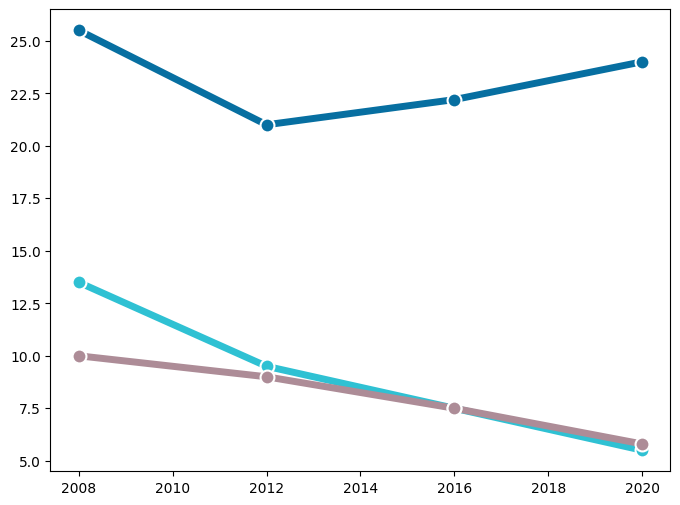

In [7]:
# Initialize plot ------------------------------------------
fig, ax = plt.subplots(figsize=(8, 6))

# Add lines with dots
# Note the zorder to have dots be on top of the lines
for percentage, color in zip(percentages, COLORS):
    ax.plot(year, percentage, color=color, lw=5)
    ax.scatter(year, percentage, fc=color, s=100, lw=1.5, ec="white", zorder=12)

This is a fair start! There's still lot to do! Let's continue with some axis customizations.

### Customize axis

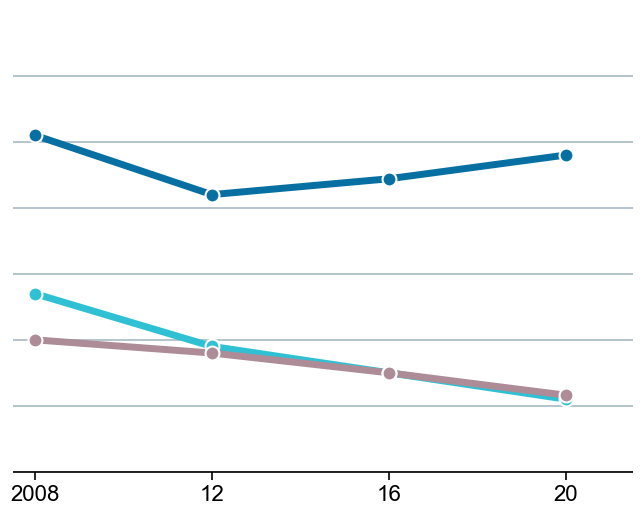

In [8]:
# Customize axis -------------------------------------------
# Customize y-axis ticks
ax.yaxis.set_ticks([i * 5 for i in range(0, 7)])
ax.yaxis.set_ticklabels([i * 5 for i in range(0, 7)])
ax.yaxis.set_tick_params(labelleft=False, length=0)

# Customize y-axis ticks
ax.xaxis.set_ticks([2008, 2012, 2016, 2020])
ax.xaxis.set_ticklabels([2008, 12, 16, 20], fontsize=16, fontfamily="Arial", fontweight=100)
ax.xaxis.set_tick_params(length=6, width=1.2)

# Make gridlines be below most artists.
ax.set_axisbelow(True)

# Add grid lines
ax.grid(axis = "y", color="#A8BAC4", lw=1.2)

# Remove all spines but the one in the bottom
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)

# Customize bottom spine
ax.spines["bottom"].set_lw(1.2)
ax.spines["bottom"].set_capstyle("butt")

# Set custom limits
ax.set_ylim(0, 35)
ax.set_xlim(2007.5, 2021.5)

fig

It starts to look elegant!

### Add labels and annotations

This is where one can see a very subtle detail in action. If you have a look at the label for Lation America and the Caribbean, you are going to notice the text does not overlap with the horizontal grid line at 5, as if the text has a background or a border. In the following chunk, we're going to create this effect using the `withStroke()` path effect in Matplotlib. This is going to add a border to te text that is going to cover the grid line passing behind the text.

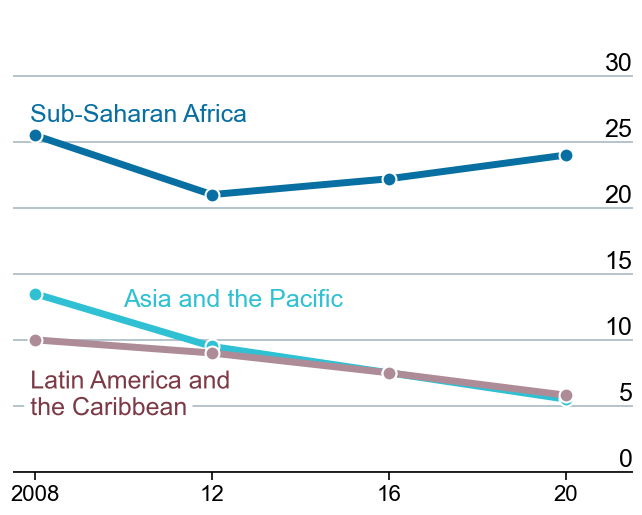

In [9]:
# Add labels for vertical grid lines -----------------------
# The pad is equal to 1% of the vertical range (35 - 0)
PAD = 35 * 0.01
for label in [i * 5 for i in range(0, 7)]:
    ax.text(
        2021.5, label + PAD, label, 
        ha="right", va="baseline", fontsize=18,
        fontfamily="Arial", fontweight=100
    )

# Annotate labels for regions ------------------------------

# Note the path effect must be a list
path_effects = [withStroke(linewidth=10, foreground="white")]

# We create a function to avoid repeating 'ax.text' many times
def add_region_label(x, y, text, color, path_effects, ax):
    ax.text(
        x, y, text, color=color,
        fontfamily="Arial", fontsize=18, 
        va="center", ha="left", path_effects=path_effects
    ) 
region_labels = [
    {
        "x": 2007.9, "y": 5.8, "text": "Latin America and\nthe Caribbean", 
        "color": BROWN_DARKER, "path_effects": path_effects},
    {
        "x": 2010, "y": 13, "text": "Asia and the Pacific", 
        "color": GREEN, "path_effects": []
    },
    {
        "x": 2007.9, "y": 27, "text": "Sub-Saharan Africa", 
        "color": BLUE, "path_effects": []
    },
]    

for label in region_labels:
    add_region_label(**label, ax=ax)

fig

Do you see that the grid line at five cannot be seen between the letters in **the Caribbean**? This is because of the effect we've just added.

### Add title

The last step to reproduce this plot is to add a proper title. Note this title mixes bold and regular text, and also contains a little horizontal line on top of it.

Matplotlib does not provide any function to mix both normal and bold text. Fortunately, there's `flexitext`. This allows us to draw text with different formats very easily using a formatted string.

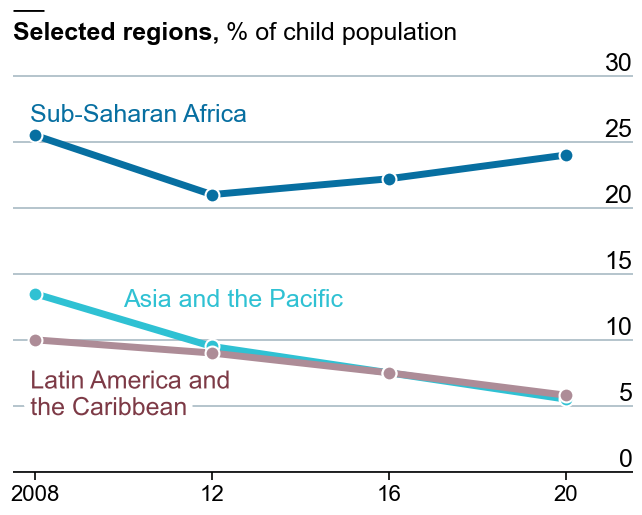

In [10]:
# Add title ------------------------------------------------

# Use flexitext instead of `ax.text()`
text = "<name:Arial, size:18><weight:bold>Selected regions,</> % of child population</>"
flexitext(0, 0.975, text, va="top", ax=ax)

# This is the small line on top of the title
# Note the 'solid_capstyle' and the 'transform', these are very important.
ax.add_artist(
    lines.Line2D(
        [0, 0.05], [1, 1], lw=2, color="black",
        solid_capstyle="butt", transform=ax.transAxes
    )
)
fig

## Stacked area chart

The stacked area chart on the right contains information about the rest of the world too, so we add the grey color to the `COLORS` list. This is also where the data for the counts is created.

In [11]:
COLORS += [GREY]
counts = [
    [65, 55, 67, 85],
    [130, 85, 65, 50],
    [10, 10, 10, 8],
    [60, 20, 10, 16]
    
]

### Basic stacked area chart

Thanks to the `.stackplot()` method, it is quite straightforward to create a [stacked area chart](https://python-graph-gallery.com/stacked-area-plot/) in Matplotlib. The `lw` and the `edgecolor` arguments correspond to the linewidth and the color of the line between the areas.

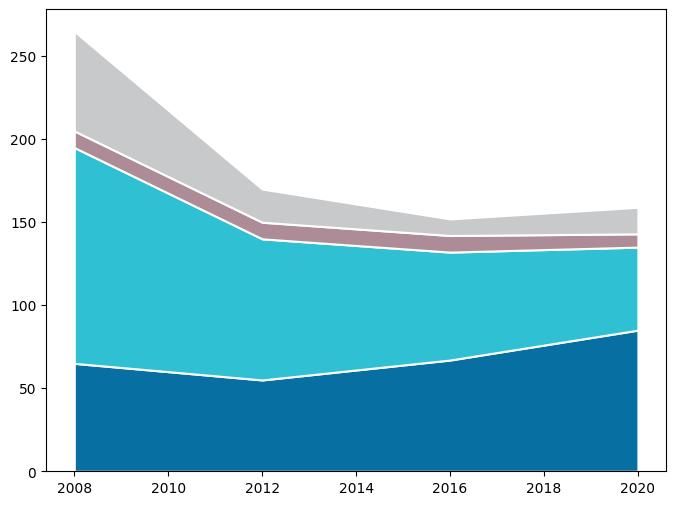

In [12]:
# Initialize plot ------------------------------------------
fig, ax = plt.subplots(figsize=(8, 6))

# Add stacked area
ax.stackplot(year, counts, colors=COLORS, lw=1.5, edgecolor='white');

### Customize axis

As with the linechart, the second step is to customize the axis.

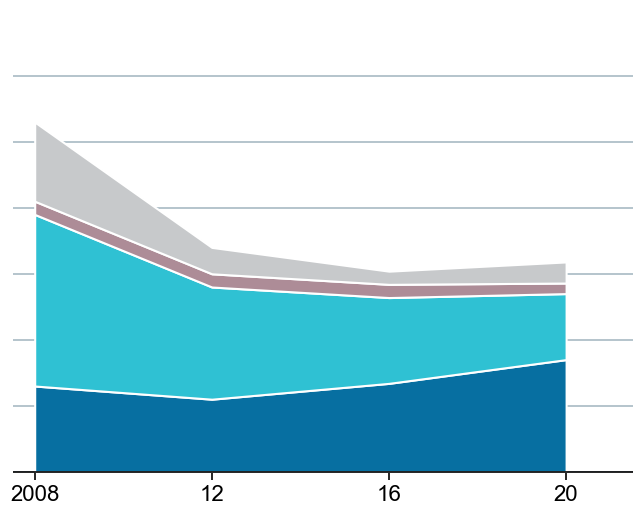

In [13]:
# Customize y-axis ticks
ax.yaxis.set_ticks([i * 50 for i in range(0, 7)])
ax.yaxis.set_ticklabels([i * 50 for i in range(0, 7)])
ax.yaxis.set_tick_params(labelleft=False, length=0)

# Customize x-axis ticks
ax.xaxis.set_ticks([2008, 2012, 2016, 2020])
ax.xaxis.set_ticklabels([2008, 12, 16, 20], fontsize=16, fontfamily="Arial", fontweight=100)
ax.xaxis.set_tick_params(length=6, width=1.2)

# Make gridlines be below most artists.
ax.set_axisbelow(True)

# Add grid lines
ax.grid(axis = "y", color="#A8BAC4", lw=1.2)

# Remove all spines but the one in the bottom
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)

# Customize bottom spine
ax.spines["bottom"].set_lw(1.2)
ax.spines["bottom"].set_capstyle("butt")

# Specify both horizontal and vertical limits
ax.set_ylim(0, 350)
ax.set_xlim(2007.5, 2021.5)

fig

### Add labels and annotations

Now it's the turn for labels and annotations. Notice the `path_effects` are empty now because we don't need to add any border effect. On the other hand, do also notice how we come up with something that looks like an arrow with a circle in the tip.

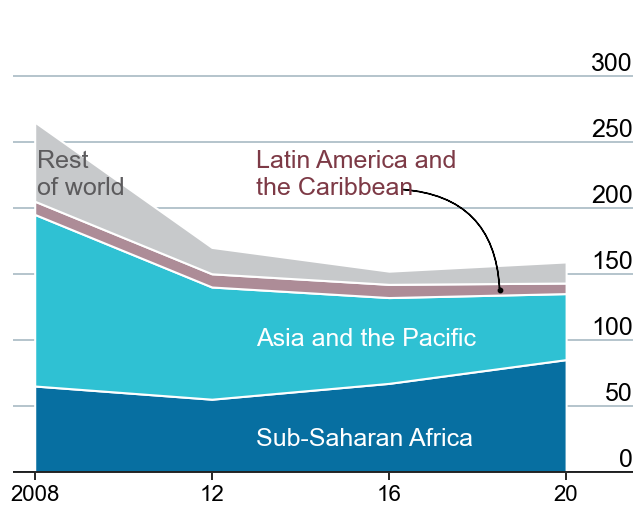

In [14]:
# Add labels for vertical grid lines -----------------------
# The pad is equal to 1% of the vertical range (350 - 0)
PAD = 350 * 0.01
for label in [i * 50 for i in range(0, 7)]:
    ax.text(
        2021.5, label + PAD, label, 
        ha="right", va="baseline", fontsize=18,
        fontfamily="Arial", fontweight=100
    )
    
# Annotate labels for regions ------------------------------
# We use the 'add_region_labels()' function from above
region_labels = [
    {"x": 2013, "y": 225, "text": "Latin America and\nthe Caribbean", "color": BROWN_DARKER, "path_effects":[]},
    {"x": 2013, "y": 100, "text": "Asia and the Pacific", "color": "white", "path_effects":[]},
    {"x": 2013, "y": 25, "text": "Sub-Saharan Africa", "color": "white", "path_effects":[]},
    {"x": 2008.05, "y": 225, "text": "Rest\nof world", "color": GREY_DARKER, "path_effects":[]},
]    

for label in region_labels:
    add_region_label(**label, ax=ax)


# Add custom arrow-like line -------------------------------
# It's not possible to use a dot as an arrowhead.
# So we add an arrow without a head, but we then add a point
# using `ax.scatter()` as shown below
ax.add_artist(
    patches.FancyArrowPatch(
        (2016.25, 214), (2018.5, 137),
        arrowstyle = "Simple", 
        connectionstyle="arc3, rad=-0.45",
        color="k"
    )
)

ax.scatter(2018.5, 138, s=10, color="k")    
    
    
fig

### Add title

And finally, just add the title. There's nothing new here, since it uses the same techniques than the other chart.

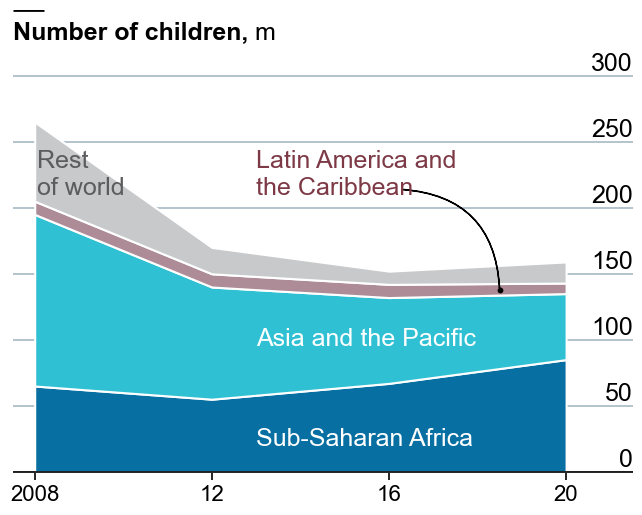

In [15]:
# Add title ------------------------------------------------

# Use flexitext instead of `ax.text()`
text = "<name:Arial, size:18><weight:bold>Number of children,</> m</>"
flexitext(0, 0.975, text, va="top", ax=ax)

# Same line on top of title
ax.add_artist(
    lines.Line2D(
        [0, 0.05], [1, 1], lw=2, color="black",
        solid_capstyle="butt", transform=ax.transAxes
    )
)

fig

## Full chart

Let's get started by creating a layout with two subplots. This is also adjusted so it does not contain any extra space on both left and right ends.

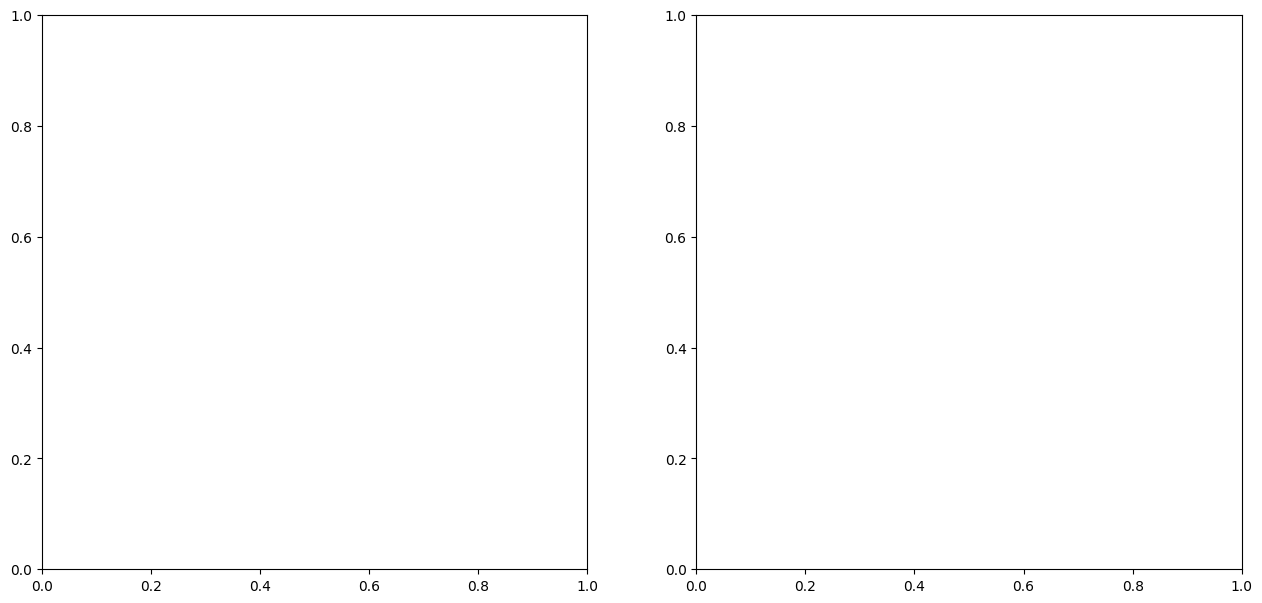

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 7.2))
fig.subplots_adjust(left=0, right=1)

# Set background to white. Useful when saving a .png
fig.set_facecolor("w")

You may have noticed that many of the steps to customize the axis are quite repetitive. The following function takes an `Axis` object and apply several customizations that are common to both the left and right plots.

In [17]:
def customize_axis(ax):
   # Make gridlines be below most artists.
    ax.set_axisbelow(True)

    # Add grid lines
    ax.grid(axis = "y", color="#A8BAC4", lw=1.2)

    # Customize x-axis ticks
    ax.xaxis.set_ticks([2008, 2012, 2016, 2020])
    ax.xaxis.set_ticklabels([2008, 12, 16, 20], fontsize=16, fontfamily="Arial", fontweight=100)
    ax.xaxis.set_tick_params(length=6, width=1.2)
    
    # Remove all spines but the one in the bottom
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Customize bottom spine
    ax.spines["bottom"].set_lw(1.2)
    ax.spines["bottom"].set_capstyle("butt") 


## Add linechart

In this step, we add the linechart to the layout created above. Note the code is exactly like the code we used to create the plot above. Most of the comments have been removed to avoid more redundancy.

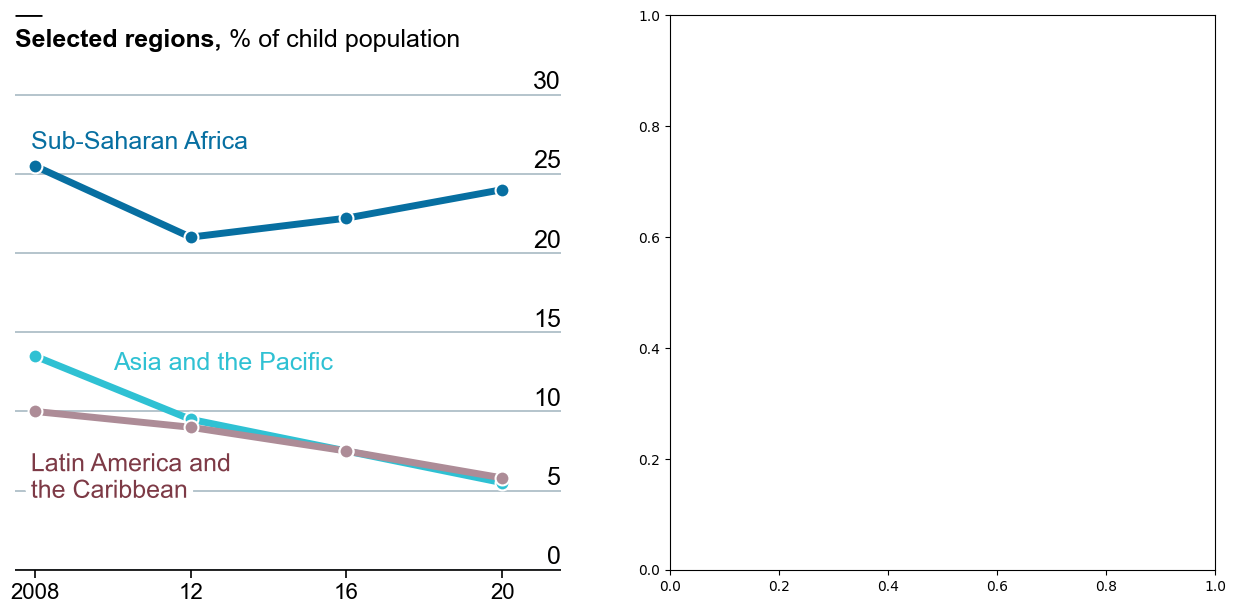

In [18]:
# Add lines with dots
for percentage, color in zip(percentages, COLORS):
    axes[0].plot(year, percentage, color=color, lw=5)
    axes[0].scatter(year, percentage, fc=color, s=100, lw=1.5, ec="white", zorder=12)

# Customize axis -------------------------------------------
axes[0].yaxis.set_ticks([i * 5 for i in range(0, 7)])
axes[0].yaxis.set_ticklabels([i * 5 for i in range(0, 7)])
axes[0].yaxis.set_tick_params(labelleft=False, length=0)

customize_axis(axes[0])

axes[0].set_ylim(0, 35)
axes[0].set_xlim(2007.5, 2021.5)

# Add labels for vertical grid lines -----------------------
PAD = 35 * 0.01
for label in [i * 5 for i in range(0, 7)]:
    axes[0].text(
        2021.5, label + PAD, label, 
        ha="right", va="baseline", fontsize=18,
        fontfamily="Arial", fontweight=100
    )

# Annotate labels for regions ------------------------------
path_effects = [withStroke(linewidth=10, foreground="white")]
region_labels = [
    {
        "x": 2007.9, "y": 5.8, "text": "Latin America and\nthe Caribbean", 
        "color": BROWN_DARKER, "path_effects": path_effects},
    {
        "x": 2010, "y": 13, "text": "Asia and the Pacific", 
        "color": GREEN, "path_effects": []
    },
    {
        "x": 2007.9, "y": 27, "text": "Sub-Saharan Africa", 
        "color": BLUE, "path_effects": []
    },
]    

for label in region_labels:
    add_region_label(**label, ax=axes[0])

# Add title ------------------------------------------------
# Use flexitext instead of `ax.text()`
text = "<name:Arial, size:18><weight:bold>Selected regions,</> % of child population</>"
flexitext(0, 0.975, text, va="top", ax=axes[0])
axes[0].add_artist(
    lines.Line2D(
        [0, 0.05], [1, 1], lw=2, color="black",
        solid_capstyle="butt", transform=axes[0].transAxes
    )
)
fig

## Add stacked area chart

Similarily than with the linechart, this adds the stacked area chart to the layout.

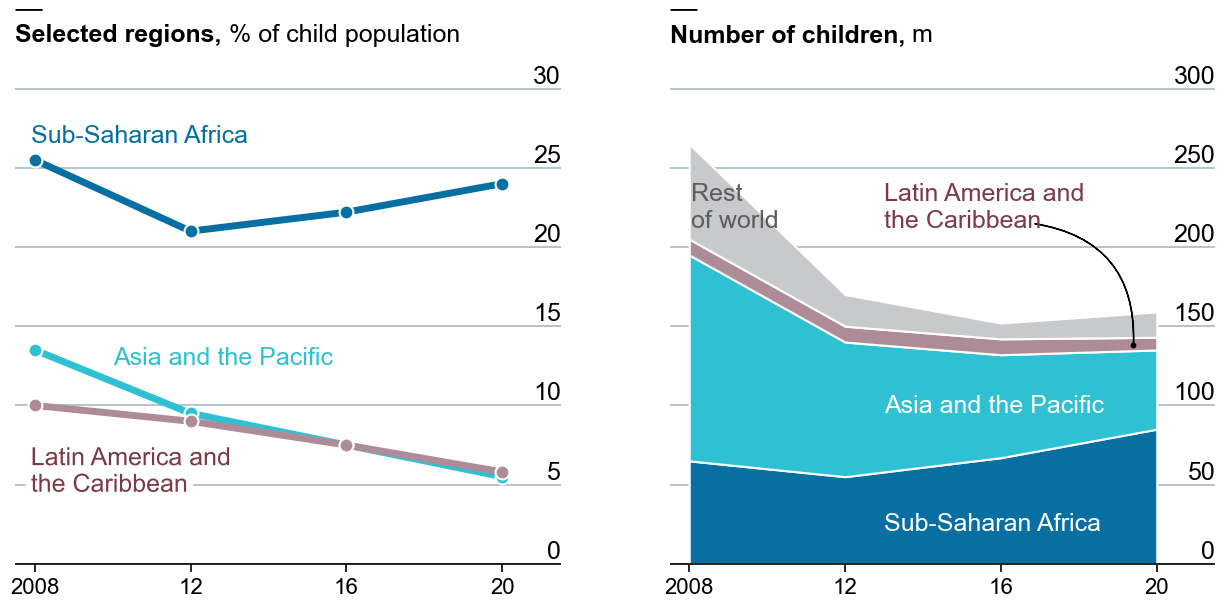

In [19]:
# Add stacked area
axes[1].stackplot(year, counts, colors=COLORS, lw=1.5, edgecolor='white');

# Customize axis -------------------------------------------
axes[1].yaxis.set_ticks([i * 50 for i in range(0, 7)])
axes[1].yaxis.set_ticklabels([i * 50 for i in range(0, 7)])
axes[1].yaxis.set_tick_params(labelleft=False, length=0)

customize_axis(axes[1])

axes[1].set_ylim(0, 350)
axes[1].set_xlim(2007.5, 2021.5)

# Add labels for vertical grid lines -----------------------
PAD = 350 * 0.01
for label in [i * 50 for i in range(0, 7)]:
    axes[1].text(
        2021.5, label + PAD, label, 
        ha="right", va="baseline", fontsize=18,
        fontfamily="Arial", fontweight=100
    )
    

# Annotate labels for regions ------------------------------
region_labels = [
    {"x": 2013, "y": 225, "text": "Latin America and\nthe Caribbean", "color": BROWN_DARKER, "path_effects":[]},
    {"x": 2013, "y": 100, "text": "Asia and the Pacific", "color": "white", "path_effects":[]},
    {"x": 2013, "y": 25, "text": "Sub-Saharan Africa", "color": "white", "path_effects":[]},
    {"x": 2008.05, "y": 225, "text": "Rest\nof world", "color": GREY_DARKER, "path_effects":[]},
]  

for label in region_labels:
    add_region_label(**label, ax=axes[1])


# Add custom arrow-like line -------------------------------
axes[1].add_artist(
    patches.FancyArrowPatch(
        (2016.8, 215), (2019.4, 137),
        arrowstyle = "Simple", 
        connectionstyle="arc3, rad=-0.45",
        color="k"
    )
)

axes[1].scatter(2019.4, 138, s=10, color="k")

# Add title ------------------------------------------------
text = "<name:Arial, size:18><weight:bold>Number of children,</> m</>"
flexitext(0, 0.975, text, va="top", ax=axes[1])

axes[1].add_artist(
    lines.Line2D(
        [0, 0.05], [1, 1], lw=2, color="black",
        solid_capstyle="butt", transform=axes[1].transAxes
    )
)

fig

Finally, it starts to look like the original chart on top. It's been a lot of work, we're really close to get the final result. Just the next step, and this will be done. Let's do it!

## Add extra annotations

Subtle, well-thought annotations and marks, together with a style refined throughout the years, are what make visualizations from The Economist stand out. In this last step, we add extra annotations that are going to give this chart the final tweaks it needs.

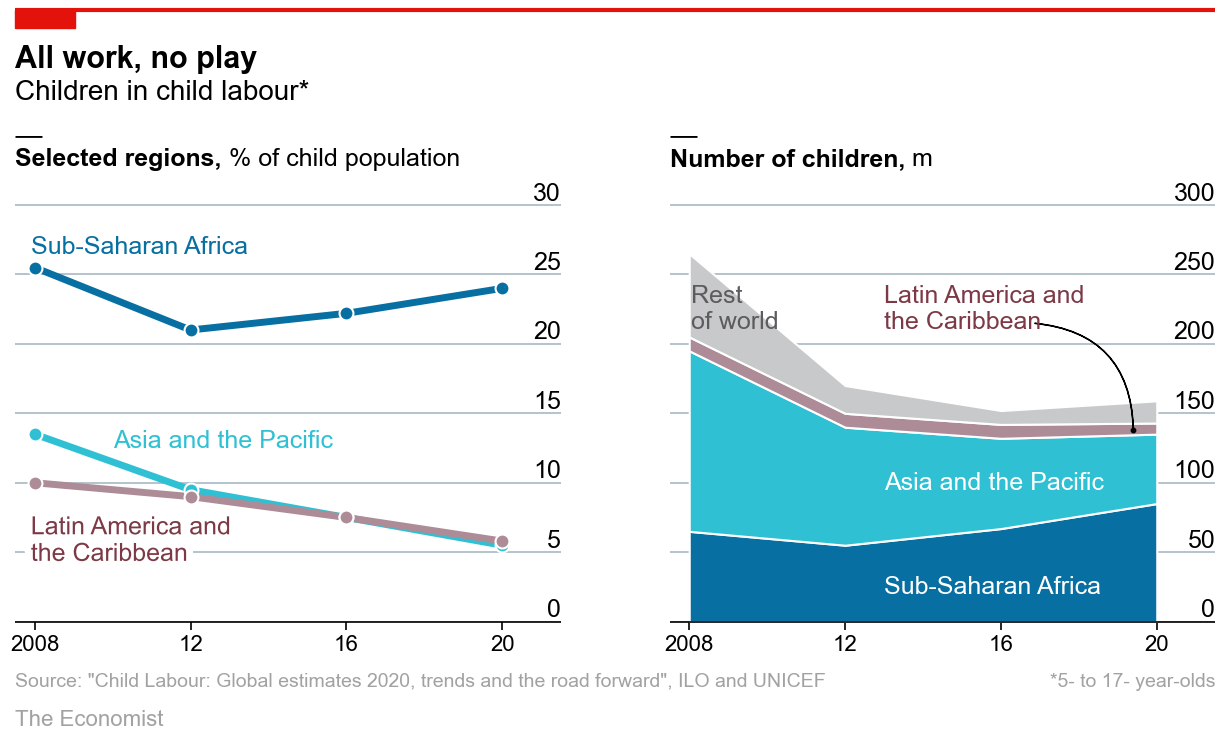

In [20]:
# Make room below on top and bottom
fig.subplots_adjust(top=0.825, bottom=0.15)

# Add title
fig.text(
    0, 0.92, "All work, no play", 
    fontsize=22,
    fontweight="bold", 
    fontfamily="Arial"
)
# Add subtitle
fig.text(
    0, 0.875, "Children in child labour*", 
    fontsize=20, 
    fontfamily="Arial"
)

# Add caption
source = 'Source: "Child Labour: Global estimates 2020, trends and the road forward", ILO and UNICEF'
fig.text(
    0, 0.06, source, color="#a2a2a2", 
    fontsize=14, fontfamily="Arial"
)
fig.text(
    1, 0.06, "*5- to 17- year-olds", color="#a2a2a2", ha="right",
    fontsize=14, fontfamily="Arial"
)
# Add authorship
fig.text(
    0, 0.005, "The Economist", color="#a2a2a2",
    fontsize=16, fontfamily="Arial"
)

# Add line and rectangle on top.
fig.add_artist(lines.Line2D([0, 1], [1, 1], lw=3, color=RED, solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 0.975), 0.05, 0.025, color=RED))
fig

# If you want to save the plot to see it in better quality
#fig.savefig("plot.png", dpi=300)

Voilà! We nailed it! 🎉

## References

This page showcases the work by the data visualization team at [The Economist](https://www.economist.com/). You can find the original chart in [this article](https://www.economist.com/graphic-detail/2021/08/23/the-number-of-child-labourers-has-increased-for-the-first-time-in-20-years).

Thanks to them for all the inspiring and insightful visualizations! Thanks also to [Tomás Capretto](https://tcapretto.netlify.app/) who replicated the chart in Python! 🙏🙏